

**Introduction :Logistic Regression**

Logistic regression is a fundamental classification technique in machine learning and statistics used to predict the probability of a binary outcome based on one or more predictor variables. The logistic regression model employs the logistic function, also known as the sigmoid function, to map predicted values to probabilities between 0 and 1. This assignment involves implementing logistic regression from scratch using gradient descent, a powerful optimization technique, and applying it to a simplified binary classification problem.

The procedure begins with the preparation of the dataset, which includes loading the data, preprocessing, and splitting it into training and test sets. Preprocessing steps, such as feature scaling, ensure that the model converges more efficiently during training. The logistic regression model is then initialized with specified parameters for learning rate and number of iterations.

During the training phase, the model iteratively updates its coefficients using gradient descent. This involves computing the linear combination of inputs, applying the sigmoid function to get probabilities, calculating the gradient of the cost function, and updating the coefficients accordingly. The cost function, or log-loss, is minimized over iterations to improve the model's accuracy.

After training, the model is evaluated using performance metrics like precision, recall, and the F1-score, which provide insights into its classification capabilities. The cost history is also plotted to visualize the convergence of the model.

This assignment not only demonstrates the implementation of logistic regression but also highlights the importance of data preprocessing, model evaluation, and the interpretation of results in a real-world context. The comprehensive approach ensures a thorough understanding of logistic regression and its application in binary classification problems.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = (iris.target == 0).astype(int)  # Setosa vs. Not Setosa

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



Logistic Regression Model:
Coefficients (beta): [-2.14434757 -1.00332553  1.75592985 -2.07483003 -1.91275364]

Performance Metrics for Logistic Regression Model:
Training Accuracy: 1.0
Test Accuracy: 1.0

Classification Report (Test):
               precision    recall  f1-score   support

  Not Setosa       1.00      1.00      1.00        19
      Setosa       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


ROC-AUC Score (Test): 1.0


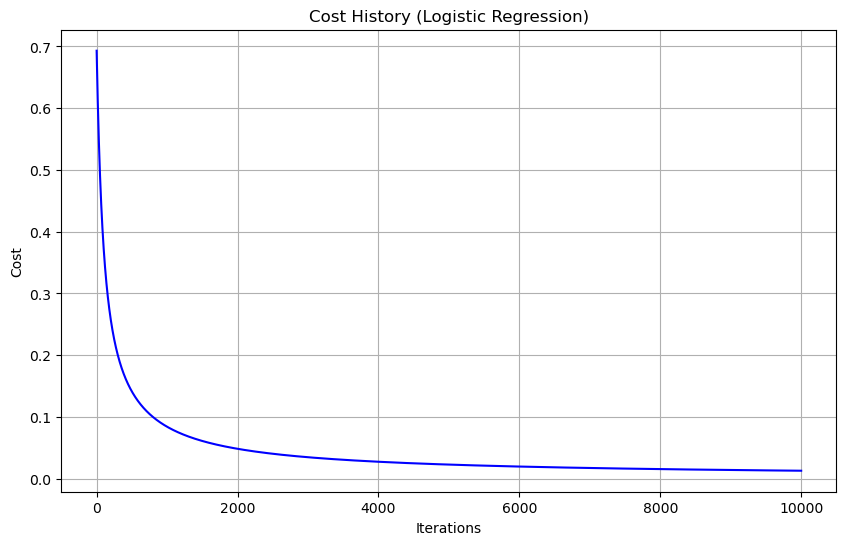

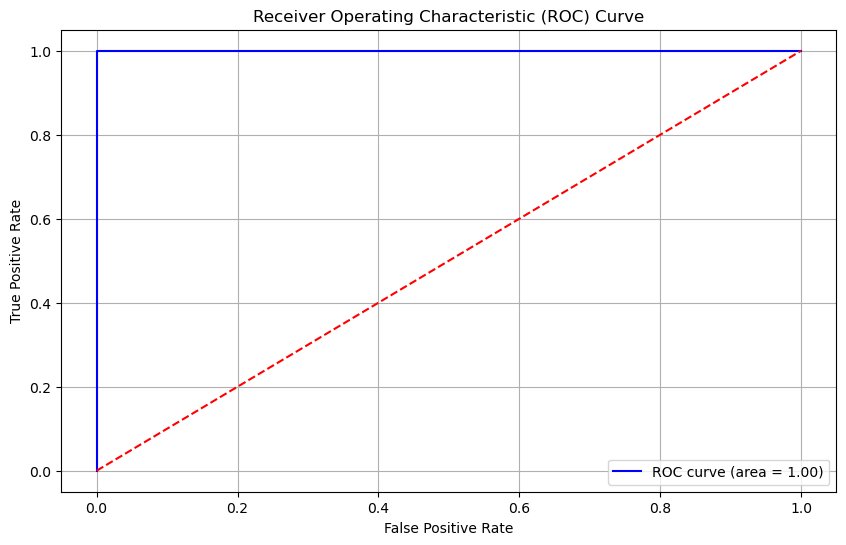

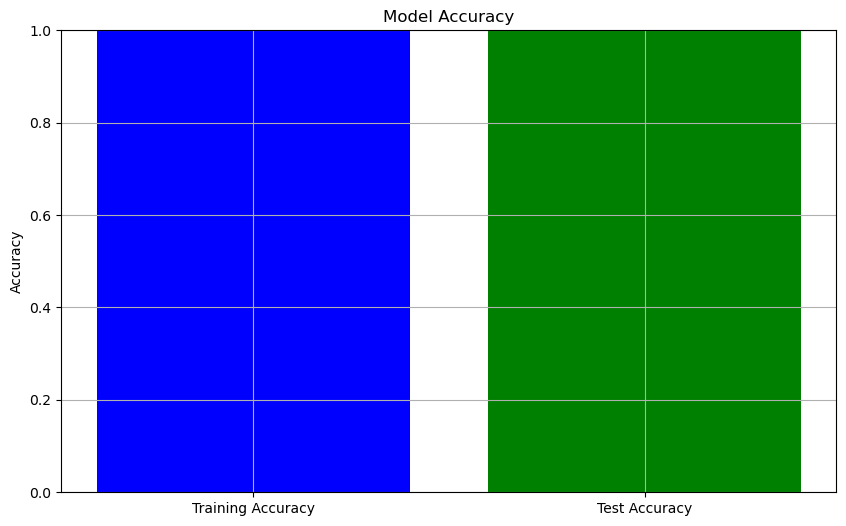

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = (iris.target == 0).astype(int)  # Binary target (Setosa vs. Not Setosa)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the features to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate  # Learning rate for gradient descent
        self.iterations = iterations  # Number of iterations for gradient descent
        self.beta = None  # Initialize coefficients (will be set in the fit method)
        self.cost_history = []  # List to store cost values for each iteration

    def sigmoid(self, z):
        # Sigmoid function to map predictions to probabilities
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Add intercept term to feature matrix
        X = np.insert(X, 0, 1, axis=1)  # Insert column of ones for intercept term
        y = np.array(y).flatten()  # Flatten y to ensure it's a 1D array
        self.beta = np.zeros(X.shape[1])  # Initialize coefficients to zeros
        n = len(y)  # Number of training samples

        # Gradient descent loop
        for i in range(self.iterations):
            z = np.dot(X, self.beta)  # computes the linear combination of inputs and coefficients, also known as the logit. X is the feature matrix and self.beta are the model parameters (coefficients)
            h = self.sigmoid(z)  # The sigmoid function outputs a value between 0 and 1, which can be interpreted as the probability of the positive class
            gradient = np.dot(X.T, (h - y)) / n  # The gradient indicates the direction and magnitude of the change needed in the coefficients to reduce the cost function. The dot product np.dot(X.T, (h - y)) sums up the contributions of each feature across all data points, and dividing by n (the number of data points) averages this contribution.
            self.beta -= self.learning_rate * gradient  #Gradient descent iteratively updates the coefficients to minimize the cost function. The learning rate alpha determines the size of the steps taken towards the minimum.

            # Compute cost function (log-loss)
            """The log-loss function penalizes incorrect predictions with a large cost and rewards 
            correct predictions with a small cost. This provides a measure of the model's performance 
            that gradient descent aims to minimize."""
            
            cost = -np.mean(y * np.log(h + 1e-5) + (1 - y) * np.log(1 - h + 1e-5))
            self.cost_history.append(cost)  # Store cost for this iteration

            # Check for convergence or NaN values
            if np.isnan(cost):
                print(f"Warning: NaN values encountered at iteration {i}. Adjusting parameters.")
                self.beta = np.nan_to_num(self.beta)  # Replace NaN values with zeros
                break

        return self  # Return the instance for method chaining

    def predict_prob(self, X):
        # Predict probabilities for given inputs
        X = np.insert(X, 0, 1, axis=1)  # Add intercept term
        return self.sigmoid(np.dot(X, self.beta))  # Apply sigmoid to linear combination

    def predict(self, X):
        # Predict binary outcomes (0 or 1) based on probability threshold of 0.5
        return (self.predict_prob(X) >= 0.5).astype(int)

    def accuracy(self, y_true, y_pred):
        # Calculate accuracy as the proportion of correct predictions
        return np.mean(y_true == y_pred)

    def classification_report(self, y_true, y_pred):
        # Generate a classification report with precision, recall, and F1-score
        return classification_report(y_true, y_pred, target_names=['Not Setosa', 'Setosa'])

    def roc_auc(self, y_true, y_prob):
        # Calculate ROC-AUC score to measure the area under the ROC curve
        return roc_auc_score(y_true, y_prob)

    def roc_curve(self, y_true, y_prob):
        # Generate the false positive rate and true positive rate for plotting ROC curve
        return roc_curve(y_true, y_prob)

if __name__ == "__main__":
    # Initialize and train the Logistic Regression model using gradient descent
    model_lr = LogisticRegressionGD(learning_rate=0.01, iterations=10000)
    model_lr.fit(X_train, y_train)

    # Make predictions for the training and test sets
    y_pred_train = model_lr.predict(X_train)
    y_pred_test = model_lr.predict(X_test)
    y_prob_test = model_lr.predict_prob(X_test)

    # Print coefficients of the logistic regression model
    print("\nLogistic Regression Model:")
    print(f"Coefficients (beta): {model_lr.beta}")

    # Performance metrics
    print("\nPerformance Metrics for Logistic Regression Model:")
    print("Training Accuracy:", model_lr.accuracy(y_train, y_pred_train))  # Training accuracy
    print("Test Accuracy:", model_lr.accuracy(y_test, y_pred_test))  # Test accuracy

    # Classification Report
    print("\nClassification Report (Test):\n", model_lr.classification_report(y_test, y_pred_test))

    # ROC-AUC
    roc_auc = model_lr.roc_auc(y_test, y_prob_test)
    print("\nROC-AUC Score (Test):", roc_auc)

    # Plotting the cost history to show the convergence of the algorithm
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(model_lr.cost_history)), model_lr.cost_history, color='blue')
    plt.title('Cost History (Logistic Regression)')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.grid(True)
    plt.show()

    # Plotting the ROC Curve
    fpr, tpr, _ = model_lr.roc_curve(y_test, y_prob_test)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random classifier
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # Plotting the accuracy for training and test sets
    plt.figure(figsize=(10, 6))
    plt.bar(['Training Accuracy', 'Test Accuracy'], 
            [model_lr.accuracy(y_train, y_pred_train), model_lr.accuracy(y_test, y_pred_test)], 
            color=['blue', 'green'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
    plt.grid(True)
    plt.show()
